# __Física Computacional:__ _Tarea 2_

### Joshua Briones Andrade
#### Fecha de entrega: _3 de Febrero_
_______________

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rcParams["figure.figsize"] = [8, 6] # ancho, alto de figuras
plt.rcParams["font.size"] = 12 #tamaño de letra de las figuras

## Interpolación

1. Sea $f(x) = 2\sin(\pi x/6)$ (con el ángulo medido en radianes).

    a) Use el polinomio de Lagrangre $P_2$ con nodos $x_0 = 0$, $x_1 = 1$ y $x_2 = 3$ para aproximar $f(2)$ y $f(2.4)$,

    b) Use el polinomio de Lagrangre $P_3$ con nodos $x_0 = 0$, $x_1 = 1$, $x_2 = 3$ y $x_3 = 5$ para aproximar $f(2)$ y $f(2.4)$,

    c) Use el polinomio de Lagrangre $P_2$ con nodos $x_0 = 0$, $x_1 = 1$ y $x_2 = 3$ para aproximar $f(4)$ y $f(3.5)$,

    d) Use el polinomio de Lagrangre $P_3$ con nodos $x_0 = 0$, $x_1 = 1$, $x_2 = 3$ y $x_3 = 5$ para aproximar $f(4)$ y $f(3.5)$.
-----

In [2]:
# Primero definimos la función 

f = lambda x: 2*np.sin(np.pi*x/6)

Puesto que los polinomios de Lagrange de grado $n$ estan definidos para $n+1$ puntos $(x_i,y_i)$ como:

\begin{equation*}
P_n(x)=y_0L_0(x)+y_1L_1(x)+\dots+y_nL_n(x)
\end{equation*}

con $L_k(x)$ definida como

\begin{equation*}
L_k(x)=\frac{(x-x_0)\dots(x-x_{k-1})(x-x_{k+1})\dots(x-x_n))}{(x_k-x_0)\dots(x_k-x_{k-1})(x_k-x_{k+1})\dots(x_k-x_n))}
\end{equation*}

tal que $P_n(x_i)=y_i$, para $i=\{0,1,\dots n\}$

In [3]:
# Definimos la función general para el polinomio P_n(x) de Lagrange como "PnLag":

def PnLag(x, puntos):
    L = []; P = 0;
    n = len(puntos);
    for k in range(n):
        l1 = 1; l2 = 1
        for i in range(n):
            if i != k:
                l1 *= (x-puntos[i])
                l2 *= (puntos[k]-puntos[i])
            else: True
        L.append(l1/l2)
    for j in range(n):
        P += f(puntos[j])*L[j]
    return P

# dado que ya definimos f(x) y conocemos la dimensión de la lista puntos, esta bien definida

f(2.0)=1.7321, P_3(2.0)=1.6667, er = 6.5384e-02 
f(2.4)=1.9021, P_3(2.4)=1.84, er = 6.2113e-02 


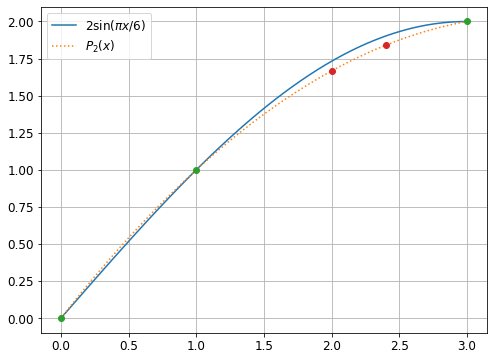

In [4]:
# a) P_2 con X = [0,1,3] para aproximar f(2) y f(2.4)

puntos = np.array([0,1,3])
puntos2 = np.array([2,2.4])

x = np.linspace(np.min(np.concatenate([puntos,puntos2])),np.max(np.concatenate([puntos,puntos2])));

plt.plot(x, f(x), label=r"$2\sin(\pi x/6)$")
plt.plot(x, PnLag(x,puntos), ":", label=r"$P_2(x)$")
plt.plot(puntos, f(puntos), "o")
plt.plot(puntos2, PnLag(puntos2,puntos), "o")
plt.legend(); plt.grid()

for i in puntos2:
    print(f"f({i})={f(i):.5}, P_3({i})={PnLag(i, puntos):.5}, er = {abs(f(i)-PnLag(i, puntos)):.4e} ")

f(2.0)=1.7321, P_3(2.0)=1.7, er = 3.2051e-02 
f(2.4)=1.9021, P_3(2.4)=1.8736, er = 2.8513e-02 


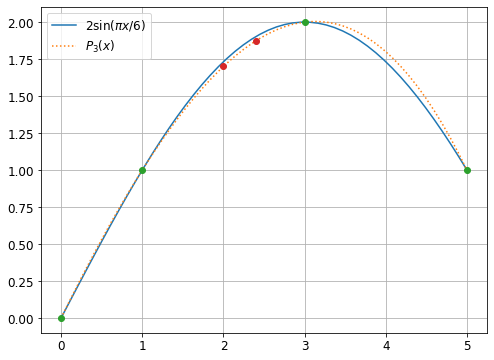

In [5]:
# b) P_3 con X=[0, 1, 3, 5] para aproximar f(2) y f(2.4),

puntos = np.array([0,1,3,5])
puntos2 = np.array([2,2.4])

x = np.linspace(np.min(np.concatenate([puntos,puntos2])),np.max(np.concatenate([puntos,puntos2])));

plt.plot(x, f(x), label=r"$2\sin(\pi x/6)$")
plt.plot(x, PnLag(x,puntos), ":", label=r"$P_3(x)$")
plt.plot(puntos, f(puntos), "o")
plt.plot(puntos2, PnLag(puntos2,puntos), "o")
plt.legend(); plt.grid()

for i in puntos2:
    print(f"f({i})={f(i):.5}, P_3({i})={PnLag(i, puntos):.5}, er = {abs(f(i)-PnLag(i, puntos)):.4e} ")

f(4.0)=1.7321, P_3(4.0)=2.0, er = 2.6795e-01 
f(3.5)=1.9319, P_3(3.5)=2.0417, er = 1.0982e-01 


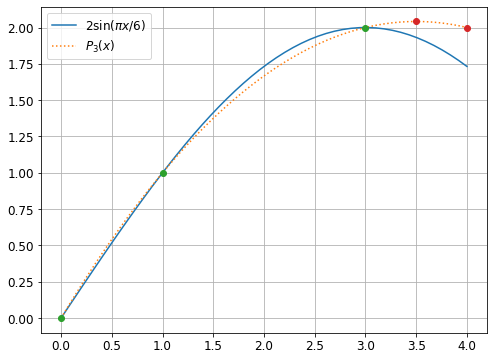

In [6]:
# c) P_2 con X=[0, 1, 3] para aproximar f(4) y f(3.5)

puntos = np.array([0,1,3])
puntos2 = np.array([4,3.5])

x = np.linspace(np.min(np.concatenate([puntos,puntos2])),np.max(np.concatenate([puntos,puntos2])));
                
plt.plot(x, f(x), label=r"$2\sin(\pi x/6)$")
plt.plot(x, PnLag(x,puntos), ":", label=r"$P_3(x)$")
plt.plot(puntos, f(puntos), "o")
plt.plot(puntos2, PnLag(puntos2,puntos), "o")
plt.legend(); plt.grid()

for i in puntos2:
    print(f"f({i})={f(i):.5}, P_3({i})={PnLag(i, puntos):.5}, er = {abs(f(i)-PnLag(i, puntos)):.4e} ")

f(4.0)=1.7321, P_3(4.0)=1.8, er = 6.7949e-02 
f(3.5)=1.9319, P_3(3.5)=1.9688, er = 3.6898e-02 


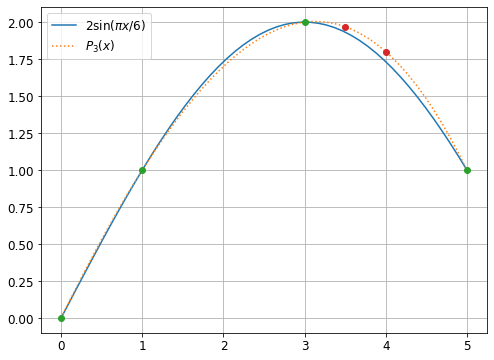

In [7]:
# d) P_3 con X=[0, 1, 3, 5] para aproximar f(4) y f(3.5)

puntos = np.array([0,1,3,5])
puntos2 = np.array([4,3.5])

x = np.linspace(np.min(np.concatenate([puntos,puntos2])),np.max(np.concatenate([puntos,puntos2])));
                
plt.plot(x, f(x), label=r"$2\sin(\pi x/6)$")
plt.plot(x, PnLag(x,puntos), ":", label=r"$P_3(x)$")
plt.plot(puntos, f(puntos), "o")
plt.plot(puntos2, PnLag(puntos2,puntos), "o")
plt.legend(); plt.grid()

for i in puntos2:
    print(f"f({i})={f(i):.5}, P_3({i})={PnLag(i, puntos):.5}, er = {abs(f(i)-PnLag(i, puntos)):.4e} ")

2. Considera $f(x)=3.6/x$, De la siguiente tabla 

| $f(x)=\frac{3.6}{x}, x=2.5,\ 3.5$                    |
|:---------------------------------------------------------:|

| $k$ 	| $x_k$ 	| $f$$(x_k)$  |
|:---:	|:-----:	|:-----------:|
|  0  	|  1.0  	|   3.60  	  |
|  1  	|  2.0  	|   1.80      |
|  2  	|  3.0  	|   1.20      |
|  3  	|  4.0  	|   0.90      |
|  4  	|  5.0  	|   0.72      |



**a)** Calcula la tabla de diferencias divididas

**b)** Escribe los polinomios interpolados de Newton para $P_1(x)$, $P_2(x)$, $P_3(x)$ y $P_4(x)$.

In [8]:
# a) Importamos las librerias y funciones para facilitar el cálculo

from collections import namedtuple 
    #namedtuple() funcion que permite hacer colecciones con tublas dadas
from itertools import zip_longest 
    # zip_longest('ABCD', 'xy', fillvalue='-') --> Ax By C- D- --> #funcion dada para acomodar valores juntos
from functools import partial

f = lambda x: 3.6/x;  X = [1.0 + i for i in range(5)]  # Sonlos valores de la tabla anterior
##Tabla de diferencias divididas

f_i = [f(X[i]) for i in range(5)]
f_ii = [(f_i[i+1] - f_i[i]) / (X[i+1] - X[i]) for i in range(4)]
f_iii = [(f_ii[i+1] - f_ii[i]) / (X[i+2] - X[i]) for i in range(3)]
f_iiii = [(f_iii[i+1] - f_iii[i]) / (X[i+3] - X[i]) for i in range(2)]
f_iiiii = [(f_iiii[i+1] - f_iiii[i]) / (X[i+4] - X[i]) for i in range(1)]

ffdat = pd.DataFrame(list(zip_longest(f_i, f_ii, f_iii, f_iiii, f_iiiii, fillvalue="-")), 
          index=range(5), columns=["$f(x_i)$", "$Df(x_i)$", "$D^2 f(x_i)$", "$D^3 f(x_i)$", "$D^4 f(x_i)$"])
# print(ffdat)
pd.options.display.float_format = '{:,.5f}'.format   # formato a la tabla 
ffdat.insert(0, "$x_i$", X) #list.insert(index, element)
ffdat

,$x_i$,$f(x_i)$,$Df(x_i)$,$D^2 f(x_i)$,$D^3 f(x_i)$,$D^4 f(x_i)$
0,1.00000,3.60000,-1.80000,0.60000,-0.15000,0.03000
1,2.00000,1.80000,-0.60000,0.15000,-0.03000,-
2,3.00000,1.20000,-0.30000,0.06000,-,-
3,4.00000,0.90000,-0.18000,-,-,-
4,5.00000,0.72000,-,-,-,-


b) Para esto conviene recordar la relación de recursión:

\begin{equation*}
    P_n(x) = P_{n - 1}(x) + f[x_0, \dots, x_n](x - x_0) \dots (x - x_{n - 1})
\end{equation*}

donde $P_{n - 1}(x)$ interpola a $f(x)$ en los puntos en $\{x_1, \dots, x_{n - 1}\}$

\begin{align*}
   P_1(x) &=3.6-1.8(x-1)\\
   P_2(x) &=3.6-1.8(x-1)+0.6(x-1)(x-2) \\
   P_3(x) &=3.6-1.8(x-1)+0.6(x-1)(x-2)-0.15(x-1)(x-2)(x-3)\\
   P_4(x) &=3.6-1.8(x-1)+0.6(x-1)(x-2)-0.15(x-1)(x-2)(x-3)+0.03(x-1)(x-2)(x-3)(x-4)\\
\end{align*}

3. Con la interpolación baricentrica, resuelve

    **a)** Considera la función $\ln(x + 2)$ en el intervalo $[−1, 1]$, determina el $P_3$ de tercer orden y la cota del error $|\ln(x+ 2)−P_3|$

    **b)** Considera la función $\sin(x)$ en el intervalo $[−1, 1]$, determina el $P_3$ de tercer orden y la cota del error $|\sin(x) − P_3|$

Primero recordamos la distribución de los nodos de Chebishev de primera clase

![nodos](https://github.com/joshbrx/Fisica-Computacional/blob/master/img/chebyshev.jpg?raw=true)

\begin{equation*}
    x_j=\cos\frac{(2j+1)\pi}{2n+2},\quad j=0,1,\dots,n
\end{equation*}

de donde se tiene que los coeficientes de peso son $\omega_j$ tales que

\begin{equation*}
    \omega_j=(-1)^j\sin\frac{(2j+1)\pi}{2n+2},\quad j=0,1,\dots,n
\end{equation*}

Y también la formula simplificada de los Polinomios de Lagrange

\begin{equation*}
    P_n(x)=\frac{\sum_j^n\frac{\omega_j}{x-x_j}y_j}{\sum_j^n\frac{\omega_j}{x-x_j}}
\end{equation*}

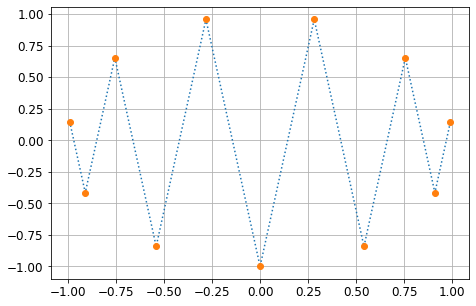

In [9]:
# Definimos las funciones para estas distribuciones

def Chev(n):
    X = []; W = [];
    for k in range(n+1):
        X.append(np.cos((2*k+1)*np.pi/(2*(n)+2)))
        W.append((-1)**k*np.sin((2*k+1)*np.pi/(2*n+2)))
    X=np.array(X); W=np.array(W);
    return X, W

plt.figure(figsize=(7.5,5))
plt.plot(Chev(10)[0],Chev(10)[1], ":")
plt.plot(Chev(10)[0],Chev(10)[1], "o")
plt.grid(); plt.show()

In [10]:
# Ahora redefinimos nuestra función simplificada de Lagrange

def PnLag2(x, X, W, Y):
    L = []; P = 0;
    n = len(X);
    l1 = 0; l2 = 0
    for k in range(n):
        l1 += (W[k]/(x-X[k]))*Y[k]
        l2 += (W[k]/(x-X[k]))
    return l1/l2

'La cota del error es: 4.0032e-03'

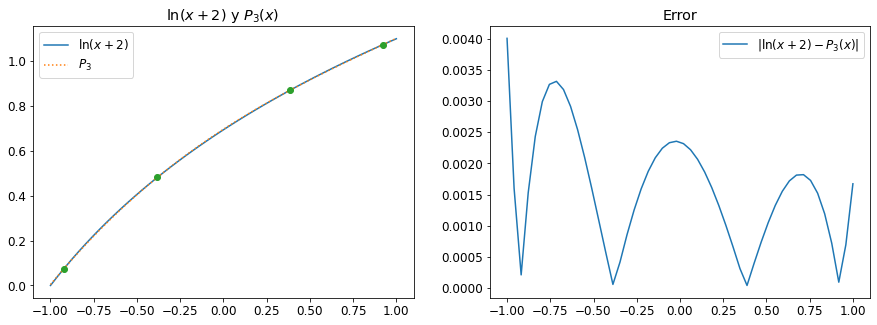

In [11]:
# a) Determina el P_3 y la cota del error |ln(x+ 2)−P_3|
# dado que debemos calcular P_3, consideramos n=3

f1 = lambda x: np.log(x+2)
X, W = Chev(3);
Y = f1(X);

x = np.linspace(-1,1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
xr = np.linspace(0, 1.4)
ax1.plot(x, f1(x), label=r"$\ln(x+2)$")
ax1.plot(x, PnLag2(x, X, W, Y), ":", label=r"$P_3$")
ax1.plot(X, Y, "o")
ax1.set_title(r"$\ln(x+2)$ y $P_3(x)$ ")
ax1.legend()

xr = np.linspace(1.08, 1.22)
ax2.plot(x, abs(f1(x)-PnLag2(x, X, W, Y)), label=r"$|\ln(x+2)-P_3(x)|$")
ax2.set_title(r"Error")
ax2.legend()

f"La cota del error es: {abs(f1(-1)-PnLag2(-1, X, W, Y)):.4e}"

'La cota del error es: 9.9304e-04'

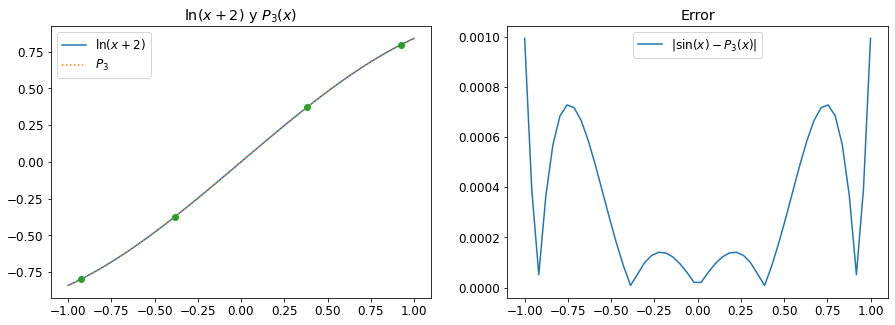

In [12]:

# b) Determina el P_3 y la cota del error |sin(x) − P_3|
# dado que debemos calcular P_3, consideramos n=3

f2 = lambda x: np.sin(x)
X, W = Chev(3);
Y = f2(X);

x = np.linspace(-1,1)

fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(15, 5))
xr = np.linspace(0, 1.4)
ax1.plot(x, f2(x), label=r"$\ln(x+2)$")
ax1.plot(x, PnLag2(x, X, W, Y), ":", label=r"$P_3$")
ax1.plot(X, Y, "o")
ax1.set_title(r"$\ln(x+2)$ y $P_3(x)$ ")
ax1.legend()

xr = np.linspace(1.08, 1.22)
ax2.plot(x, abs(f2(x)-PnLag2(x, X, W, Y)), label=r"$|\sin(x)-P_3(x)|$")
ax2.set_title(r"Error")
ax2.legend()

f"La cota del error es: {abs(f2(-1)-PnLag2(-1, X, W, Y)):.4e}"

## Integración

4. **Integración Numérica**
    Una corriente alterna está descrita por
    
    \begin{equation}\label{corriente}
        i(t)=i_0\left(\sin\frac{\pi t}{t_0}-\beta \sin\frac{2\pi t}{t_0}\right)
    \end{equation}

    donde $i_0=1$, $t_0=0.05\ s$ y $\beta=0.2$. Obtén numéricamente la corriente cuadrática media definida como
    
    \begin{equation}\label{rms}
        i_{rms}=\sqrt{\frac{1}{t_0}\int_0^{t_0}[i(t)]^2dt}
    \end{equation}
    
    Resuelve por el método que prefieras, defiende el método que usas y determina el error de tu resultado para distintas $N$.

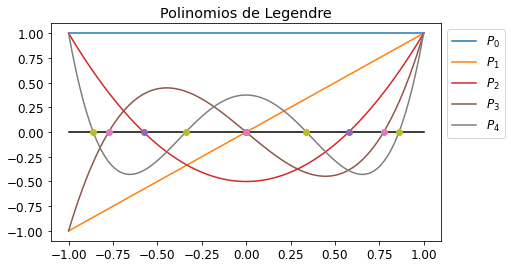

In [13]:
# Escogí el método de cuadratura Gaussiana por lo que voy a importar unas funciones especiales para simplificar el cálculo
from scipy.special import legendre, roots_legendre

def raices(n):
    y=roots_legendre(n)
    return y[0]

def P(x,n):
    Leg = legendre(n)
    y = Leg(x)
    return y

x = np.linspace(-1,1,100); plt.figure(figsize=(7,4))
plt.plot(x,0*x,'k-')
plt.plot(x,P(x,0),label=r'$P_0$') 
for i in range(1,5):
    plt.plot(x,P(x,i),label=r'$P_'+str(i)+'$') 
    plt.plot(raices(i),P(raices(i),i),'o')
plt.legend(bbox_to_anchor=(1, 1), loc='upper left', ncol=1)  
plt.title('Polinomios de Legendre'); plt.show()

Nos falta calcular los pesos $\omega_k$

\begin{equation*}
    \omega_k=\left[\frac{2}{1-x^2}\left(\frac{dP_n}{dx}\right)^{-1}\right]_{x=x_k}
\end{equation*}


In [140]:
# Construimos la función generadora de las raices y los pesos para la distribución con cuadratura Gaussiana

# def GaussXW(n, h=1e-15):
#     X = raices(n); W = [];
#     for x in X:    
#         dP = (P(x+h,n)-P(x-h,n))
#         w1 = 2/(1-x**2)
#         w2 = 2*h/dP
#         W.append(w1*w2)
#     X = np.array(X)
#     W = np.array(W)
#     return X, W

def gaussxw(N):
    #Aproximación inicial de las raíces de los polinomios de Legendre
    a = np.linspace(3,4*N-1,N)/(4*N+2)
    X = np.cos(np.pi*a+1/(8*N*N*np.tan(a)))

    # Encontramos ceros de Legendre con Newton-Raphson
    epsilon = 1e-15
    delta = 1.0
    while delta>epsilon:
        p0 = np.ones(N,float)
        p1 = np.copy(X)
        for k in range(1,N):
            p0,p1 = p1,((2*k+1)*X*p1-k*p0)/(k+1)
        dp = (N+1)*(p0-X*p1)/(1-X*X)
        dx = p1/dp
        X -= dx
        delta = max(abs(dx))

    # Calculando los pesos
    W = np.array(2*(N+1)*(N+1)/(N*N*(1-X*X)*dp*dp))
    X = np.array(-1*raices(N)[::-1])
    return X,W

def GaussXWab(N, a, b):
    X, W = gaussxw(N)
    return 0.5*(b-a)*X+0.5*(b+a),0.5*(b-a)*W

Finalmente 

\begin{equation*}
    \int_a^bf(x)dx\approx\int_a^bP_n(x)dx=\sum_{k=0}^n\omega_kf(x_k)
\end{equation*}

In [178]:
def IntGauss(N, a, b, f):
    X, W = GaussXWab(N, a, b)
    s = 0;
    for k in range(N):
        s += W[k]*f(X[k]);
    return s

i0 = 1; beta = 0.2; t0 = 0.05; #seg
I = lambda t: i0*(np.sin(np.pi*t/t0)-beta*np.sin(2*np.pi*t/t0));
I2 = lambda t: I(t)**2;
a=0; b=0.05;

for i in range(6):    
    print(f"Para n={2+2*i}: ii_rms = {np.sqrt((1/b)*IntGauss(2+2*i, a, b, I2)):.10},\t er = {abs(np.sqrt((1/b)*IntGauss(50, a, b, I2))-np.sqrt((1/b)*IntGauss(2+2*i, a, b, I2))):.4e}")
    
# print(f"\n Error con n=8: ii_rms_10-ii_rms_5 = {np.sqrt((1/b)*IntGauss(10, a, b, I2))-np.sqrt((1/b)*IntGauss(5, a, b, I2)):.4e})

Para n=2: ii_rms = 0.6460455494,	 er = 7.5065e-02
Para n=4: ii_rms = 0.7224823376,	 er = 1.3721e-03
Para n=6: ii_rms = 0.7211297728,	 er = 1.9518e-05
Para n=8: ii_rms = 0.7211103073,	 er = 5.2245e-08
Para n=10: ii_rms = 0.7211102551,	 er = 4.8788e-11
Para n=12: ii_rms = 0.7211102551,	 er = 1.9984e-14


Consideramos este método de los mejores ya que esta basado en la interpolación baricentrica por lo que se reduce el error de runge al asignarle una distribución de puntos no-homogenea y así hacer la integración solo dependiente del producto de los pesos con las proyecciones sobre f(x).

5. **El límite de difracción de un telescopio**
    Nuestra capacidad para resolver detalles en observaciones astronómicas está limitada por la difracción de luz en nuestros telescopios. La luz de las estrellas puede tratarse efectivamente como si viniera de una fuente puntual en el infinito. Cuando dicha luz, con longitud de onda $\lambda$, pasa a través de la circular apertura de un telescopio (que asumiremos que tiene un radio unitario) y está enfocado por el telescopio en el plano focal, produce no solo un punto, sino un patrón de difracción circular que consiste en una mancha central rodeada por una serie de anillos concéntricos. La intensidad de la luz en este patrón de difracción viene dada por
    
    \begin{equation}\label{intensidad}
        I(r)=\left(\frac{J_1(kr)}{kr}\right)^2,
    \end{equation}
    
    donde $r$ es la distancia en el plano focal desde el centro del patrón de difracción, $k=2\pi/\lambda$ y $J_1(x)$ es una la función de Bessel. Las funciones de Bessel $J_m$ están dadas por 
    
    \begin{equation}\label{bessel}
        J_m(x)=\frac{1}{\pi}\int_0^\pi \cos(m\theta-x\sin\theta)d\theta,
    \end{equation}
    
    donde $m$ son enteros no negativos y $x\geq 0$.
    
    Hacer una función de Python $J(m, x)$ que calcula el valor de $J_m(x)$ usando Simpson con $N= 1000$ puntos. Usamos la función en un programa para hacer una gráfica de las funciones de Bessel $J_0$, $J_1$ y $J_2$ en función de $x$, con valores de $x = 0$ a $x = 20$. 
    
    Hacer un segundo programa que haga un diagrama de densidad de la intensidad del patrón circular de difracción de una fuente de luz puntual con $\lambda = 500$ nm, en una región cuadrada del plano focal, usando la fórmula dada arriba. Tu imagen debe cubrir valores de $r$ desde $0$ hasta aproximadamente $1\ \mu m$.
    
   ![micmic](https://github.com/joshbrx/Fisica-Computacional/blob/master/img/micmic1.jpg?raw=true)
   
   ___Hint:___ El punto central en el patrón de difracción es tan brillante que puede ser difícil ver los anillos alrededor en la pantalla de la computadora. Si te encuentras con este problema, una forma sencilla de solucionarlo es usar la opción `imshow(x,vmax=0.1)`

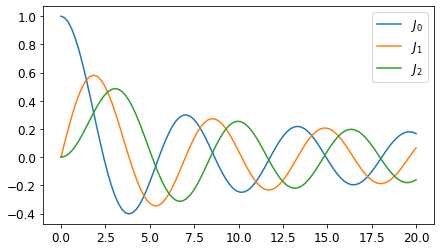

In [188]:
# Para poder resolverlo, definimos una funicón para la integración por método de Simpson

def Simpson(f, a, b, N):
    h=float((b-a)/N)
    suma = f(a)+f(b) + 4*f(b-h)
    for k in range(1,N//2):
        suma += 4*f(a + (2*k-1)*h) + 2*f(a+2*k*h)
    suma *= h/3
    return suma

def J(m,x):
    f = lambda theta: cos(m*theta - x*sin(theta))
    N = 1000; a = 0; b = np.pi;
    s = Simpson(f, 0, b, N)
    return s / np.pi

x = linspace(0,20,100)
plt.figure(figsize=(7,4))
for i in range(3):
    plt.plot(x,J(i,x),label=r"$J_"+str(i)+"$")
plt.legend(); plt.show()

<Figure size 576x432 with 0 Axes>

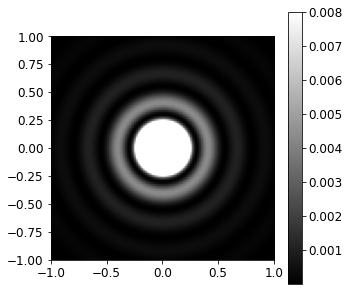

In [216]:
# Definimos el mallado y la función sobre la nueva variable r^2=x^2+y^2

x, y = np.mgrid[-1:1:100j,-1:1:100j]
r = np.sqrt(x**2+y**2)

long = 0.5; # mm
k = 2*pi / long

I = (J(1,r*k)/(k*r))**2
plt.gray(); plt.figure(figsize=(5,5))
plt.imshow(I,vmax=0.008,extent=(-1,1,-1,1))
plt.colorbar()
plt.show()

6. **Constante de Stefan-Boltzmann**
    La teoría de Planck de radiación térmica nos dice que en el intervalo de frecuencia angular $\omega$ a $\omega + d\omega$, un cuerpo negro de área unitaria irradia electromagnéticamente una cantidad de energía térmica por segundo igual a $I(\omega)d\omega$, donde
    
    \begin{equation}\label{energia termica}
        I(\omega)=\frac{\hbar}{4\pi^2c^2} \frac{\omega^3}{e^{\hbar\omega/\kappa_BT}-1}
    \end{equation}
    
    La tasa total a la que un cuerpo negro irradia energía por unidad de área sobre todas las frecuencias, es
    
    \begin{equation}\label{cuerpo negro}
        W=\frac{\kappa_B^4T^4}{4\pi^2c^2\hbar^3} \int_0^\infty \frac{x^3}{e^x-1}
    \end{equation}
    
    Integra numéricamente y encuentra $W$ con todos los métodos de integración que conocemos.    

Siguiendo las notas del libro de Marc Newmann, *Computational Physics*, para poder resolver integrales numéricas sobre rangos infinitos como $\int_0^\infty f(x)dx$ hacemos el siguiente cambio de variable

\begin{equation*}
    x=\frac{z}{1-z}
\end{equation*}

entonces $dx=dz/(1-z)^2$ por lo que

\begin{equation*}
    \int_0^\infty f(x)dx=\int_0^1 \frac{1}{(1-z)^2}f\left( \frac{z}{1-z}\right)dz,
\end{equation*}

Por lo que en nuestro caso especifico quedaría como
\begin{equation*}
        \int_0^\infty\frac{x^3}{e^x-1}dx=\int_0^1\frac{z^3}{(1-z)^5}\frac{1}{e^{\frac{z}{1-z}}-1}dz
\end{equation*}


In [246]:
# Traemos la función del método del trapecio
def trapecio(n, a, b, f):
    h = float(b - a) / n
    s = 0.0
    s += f(a)/2.0
    for i in range(1, n):
        s += f(a + i*h)
    s += f(b)/2.0
    return s * h

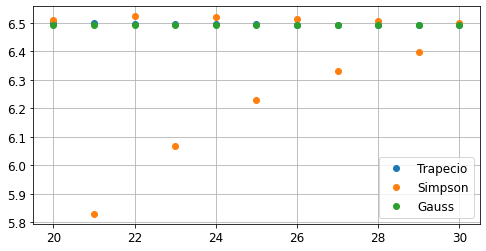

In [265]:
from scipy import constants as cte

def Bltz(z):
    g1 = z**3/(1-z)**5 
    g2 = np.exp(z/(1-z))-1
    return g1/g2

a = 0.01; b = 1-0.01;
def Integral(n):
    return np.array([trapecio(n, a, b, Bltz), Simpson(Bltz, a, b, n), IntGauss(n, a, b, Bltz)])

plt.figure(figsize=(8,4))
plt.plot([k for k in range(20,31)], [Integral(k)[0] for k in range(20,31)], "o", label="Trapecio")
plt.plot([k for k in range(20,31)], [Integral(k)[1] for k in range(20,31)], "o", label="Simpson")
plt.plot([k for k in range(20,31)], [Integral(k)[2] for k in range(20,31)], "o", label="Gauss")
plt.grid(); plt.legend(); plt.show()

In [286]:
ct1=cte.k**4/(4*cte.pi**2*cte.c**2*cte.hbar**3)

def Boltzmann(n): 
    return Integral(n) * ct1

N = 100;
valor_real= cte.sigma
list = [];

for i in range(3):
    err1=abs(Valor_real-Boltzmann(N)[i])
    err2=abs((Valor_real-Boltzmann(N)[i]) / valor_real)*100
    list.append([Valor_real, Boltzmann(N)[i], err1, err2])
    
nombres=['Trapecio','Simpson','Gauss']
cols = ["Valor Real","Valor Obtenido","Error absoluto","Error %"]
tabla = pd.DataFrame(list, index=nombres, columns=cols)
pd.options.display.float_format = '{:,.10e}'.format   # formato a la tabla
tabla


,Valor Real,Valor Obtenido,Error absoluto,Error %
Trapecio,5.6703744190e-08,5.6703739733e-08,4.4571039187e-15,7.8603344142e-06
Simpson,5.6703744190e-08,5.6703735166e-08,9.0243991343e-15,1.5914996908e-05
Gauss,5.6703744190e-08,5.6703741203e-08,2.9865005490e-15,5.2668489386e-06


7. **Producción de fotones en colisiones de iones pesados**
    En una colisión de iones pesados (Cu, Pb, Au, U, etc.) se generan fotones como producto de las interacciones fuerte y electromagnética que tienen lugar. La cantidad de fotones producidos es proporcional a
    
    |\begin{align*}\label{N}
    N(\omega_p)\sim f(\omega_p) =&\frac{\alpha_{em}\pi}{2(2\pi)^6\omega_q} \int_0^{\omega_q}d\omega_p\ (2\omega_p^2+\omega_q^2-\omega_p\omega_q)e^{-g_f(\omega_p,\omega_q)}n(\omega_p)[1+2n(|\omega_q-\omega_p|)]\\
    & \times{I_0[g_f(\omega_p,\omega_q)]-I_1[g_f(\omega_p,\omega_q)]},
    \end{align*}
    
    donde 
    
    \begin{equation*}
        g_f(\omega_p,\omega_q)=\frac{\omega_p^2+\omega_q^2-\omega_p\omega_q}{2|eB|},
    \end{equation*}
    
    y $n(\omega)$ es una distribución tipo Bose-Einstein dada por
    
    \begin{equation*}\label{eq:}
        n(\omega)=\frac{3}{e^{\omega/\Lambda}-1},
    \end{equation*}
    
    y las funciones $I_0$ e $I_1$ son funciones de Bessel modificadas de primera clase.
    
    a) Calcula $f(\omega_q)$ de manera numérica para un campo magnético de intensidad $|eB| = 0.02$
    GeV2, una constante $\Lambda = 2$ GeV y para una $\omega_q = 3$ GeV.
    
    b) Grafica la función $f$ para valores de $\omega_q \in [0.3, 3]$ GeV.




In [ ]:
#Importamos las funciones de Bessel modificadas de primera clase de Scipy.
from scipy.special import i0,i1
from scipy import constants as cte

#Definimos nuestras constantes.
a=1
eb=0.02
s=2
wq=3
def nw(wp):
    return 3/(np.e**(wp/s)-1)
def gf(wp):
    return (wp**2+wq**2-wp*wq)/(2*eb)
def fotones(wp):
    a=(2*wp**2+wq**2-wp*wq)
    b=np.e**(-gf(wp))
    c=nw(wp)
    d=1+2*nw(abs(wq-wp))
    e0=i0(gf(wp))
    e1=i1(gf(wp))
    ee=e0-e1
    y=a*b*c*d*ee
    return y 
#Solo incluiremos la integral por el método de cuadratura gaussiana, pues para los demás metodos, estos fallan.
integral=gaussxwab(fotones,100,0,wq)
cte2=(a*cte.pi)/(2*(2*cte.pi)**6*wq)
print("El valor de la integral es: %s"%(cte2*integral))

#Definimos nuestro espacio lineal
WQ=linspace(0.3,3,100)
fw=[]
for k in range(0,len(WQ)):
    w_q=WQ[k]
    cte2=(a*cte.pi)/(2*(2*cte.pi)**6*w_q)
    integral2=gaussxwab(fotones,100,0,w_q)
    fw.append(cte2*integral2)
plot(WQ,fw)

## Ecuaciones diferenciales ordinarias

8. **Pendulo Doble**
    En clase resolvimos el péndulo no lineal, también hemos hecho el péndulo amortiguado, anarmónico y cuántico. Ahora es el turno de resolver el péndulo doble. Supondremos que no tiene fricción, que las dos masas son iguales y que $L_1 = L_2 = L$ (ve la figura 1):

    (i) Deriva las ecuaciones de movimiento a programar. Usa la formulación Lagrangiana.
    
    (ii) Resuelve numéricamente las ecuaciones diferenciales con el método que prefieras y luego
    gráfica $\theta_1$ y $\theta_2$ con respecto a $t$. Defiende el método que escogiste, discute como es la simetría
    temporal y error, compara con otros métodos.
    
    Deriva las ecuaciones anteriores. Usa la formulación Lagrangiana.
    
   ![pendulo](https://github.com/joshbrx/Fisica-Computacional/blob/master/img/pendulo.jpg?raw=true)

9. **Comparemos métodos**
    El bloque de hierro magnetizado de masa $m$ está unido a un resorte de rigidez $k$ y longitud $L$. El bloque está en reposo en $x = L$ cuando un electroimán está encendido, ejerciendo una fuerza de repulsión $F = c/x_2$ en el bloque. La ecuación de movimiento resultante es
    
    \begin{equation*}
        m\ddot x=\frac{c}{x^2}-k(x-L)
    \end{equation*}
    
   ![pendulo](https://github.com/joshbrx/Fisica-Computacional/blob/master/img/resorte.jpg?raw=true)

    Determina la amplitud y el periodo. Resuelve usando tres métodos numéricos. Compara las soluciones obtenidas por los distintos métodos. Explica, ¿Por qué usas estos métodos?

10. **Numerov**
    Aplicar el algoritmo Numerov para resolver
    
    \begin{equation*}
        u''(x)=-4\pi^2u(x)
    \end{equation*}
    
    con $u(0) = 1$ y $u(0) = 0$. Discute la precisión del resultado comparando con la solución obtenida por el método de Runge-Kutta de orden 4 y con el resultado exacto.